In [12]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load Rtab
rtab = pd.read_csv("gene_presence_absence.Rtab", sep="\t")

# Extract binary matrix properly
matrix = rtab.iloc[:, 1:]
matrix = (matrix > 0).astype(int)

# Assign gene IDs correctly
matrix.index = rtab.iloc[:, 0]

print("Total gene families:", matrix.shape[0])
print("Total genomes:", matrix.shape[1])


Total gene families: 6361
Total genomes: 839


In [15]:
shuffled_cols = np.random.permutation(matrix.columns)

pan_curve = []
genes_seen = set()

for genome in shuffled_cols:
    present_genes = matrix.index[matrix[genome] == 1]
    genes_seen.update(present_genes)
    pan_curve.append(len(genes_seen))

pan_curve = np.array(pan_curve)
x = np.arange(1, len(pan_curve) + 1)


In [16]:
def heaps_model(n, kappa, gamma):
    return kappa * (n ** gamma)

params, _ = curve_fit(heaps_model, x, pan_curve)
kappa, gamma = params

# Manual R²
fitted = heaps_model(x, kappa, gamma)
ss_res = np.sum((pan_curve - fitted) ** 2)
ss_tot = np.sum((pan_curve - np.mean(pan_curve)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print("kappa:", kappa)
print("gamma:", gamma)
print("R²:", r2)


kappa: 3230.296187259583
gamma: 0.10184192884672746
R²: 0.9891510476047174


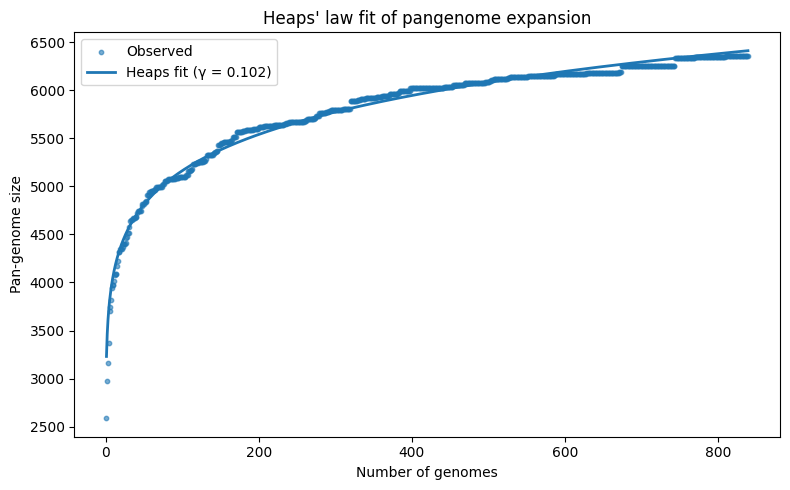

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.scatter(x, pan_curve, s=10, alpha=0.6, label="Observed")
plt.plot(x, heaps_model(x, kappa, gamma),
         linewidth=2,
         label=f"Heaps fit (γ = {gamma:.3f})")

plt.xlabel("Number of genomes")
plt.ylabel("Pan-genome size")
plt.title("Heaps' law fit of pangenome expansion")

plt.legend()
plt.tight_layout()

plt.savefig("Figure_2_HeapsLaw.png", dpi=300, bbox_inches="tight")
plt.savefig("Figure_2_HeapsLaw.pdf", bbox_inches="tight")
plt.show()


In [18]:
heaps_df = pd.DataFrame({
    "n_genomes": x,
    "pan_genome_size": pan_curve
})

heaps_df.to_csv("Heaps_law_pan_accumulation_curve.csv", index=False)


In [19]:
# Fitted values
fitted_values = heaps_model(x, kappa, gamma)

# Residual sum of squares
ss_res = np.sum((pan_curve - fitted_values) ** 2)

# Total sum of squares
ss_tot = np.sum((pan_curve - np.mean(pan_curve)) ** 2)

# R-squared
r2 = 1 - (ss_res / ss_tot)

print("R²:", r2)


R²: 0.9891510476047174


In [20]:
params_df = pd.DataFrame({
    "kappa": [kappa],
    "gamma": [gamma],
    "alpha_(1-gamma)": [1 - gamma],
    "R_squared": [r2]
})

params_df.to_csv("Heaps_law_fit_parameters.csv", index=False)
